<a href="https://colab.research.google.com/github/AgentWombat/height-weight-linear-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

---

Linear regression is perhaps the most basic use of machine learning. In this notebook you will learn what linear regression is and how to implement it from scratch in Python.

The final product of this notebook will be a program which, given a person's weight in pounds, will predict his or her height in inches.

### *What is linear regression*?

Let us say I have a data set with the weight, in pounds, and height, in inches, for 100 different people. For me, as a person, to try and predict a man's height based purely on his weight, I consult this data and make a prediction accordingly. So, I compile the data into a graph like so:

![picture](https://drive.google.com/uc?id=1qkh2BCBmqha10EdmCW-QhdoVXjyluCtc)

We notice that the data seesm to loosly fit a line; that is, I could draw a *line of best fit* in the data:

![picture](https://drive.google.com/uc?id=1sqycR27BLJmnXE-DgcqOT0Qi1nrAY_Oj)

Now, if I know that my best friend Charles is 200 pounds, I could locate the corresponding height on the line and make a somewhat accurate prediction of his height:

![picture](https://drive.google.com/uc?id=1TqzAdEazrNSt3QyK4keJSdZl3qAOgZvD)

This means that Charles is probably around 71 inches tall.

I just used linear regression: I *regressed*, or simplified, the relationship between weight and height to a linear relationship (i.e. I drew a line in my data and, to predict height, found the height corresponding to the given weight on the line). In reality, build, sex, bone density, and more play roles (which are not neccisarily linear) in determining someone's height. But for my goal, *regressing* my problem of predicting height to a linear relationship between itself and weight results in sufficient accuracy.

### *How can I quantify the above methods?*

To get my computer to accomplish the task using similar methods, I must more rigouresly define what I am doing when I draw a line of best fit.

A line is given by ```y = m * x + b``` and, for purposes of machien learning, the variable "m" will be subbed for "w" resulting in ```y = w * x + b```. If I have  values for "w" and "b", I can know "y" given any "x" by using the formula.

With this definition of a line, I can say that when I draw a line of best fit, I am implicitly choosing values for "w" and "b". When I locate a height by going to the point on the line associated with a weight, I am implicitly evaluating my function ```y (height) = w * x (weight) + b``` for a specific value of x. For the line I drew above, it looks like the formula is approximately ```y = 3/20 * x + 41```. Evaluated at 200 lbs (x = 200), I get a height of 71 inches (y = 71).

Secondarily, I must define exactly what makes a line a "good" or "bad" fit. To do this, I will define some function C(y, y_predictions) such that when a line is a good fit to the data it will have a low value; and when a line is a bad fit, the function will evaluate to a high value. One such fuction is called  *mean squared error (MSE)*.  MSE is defined as follows:

```
1/n * ∑(y_i - y_prediction_i)^2, where "n" is the number of data points and ∑ is summing over all data points.
```

MSE sums the squared differences between my guesses and their corresponding actual values. To visualize,

![picture](https://drive.google.com/uc?id=1g6zrMENG7z6W-A5ASaP2E5Hn7W0MrVAP)

The above image shows two out of the 100 squared distances which must be added to fully compute the cost.

Going back to getting my computer to "draw" this line for me, what I need to do it get it to pick values for "w" and "b". Then, based on how well it performs with its picked values, as measured by MSE, it must update "w" and "b" such that the model is likely to make better predictions, as measured by MSE, next time. For this, I must use some basic calculus--mainly, the derivative. [Here is a link to a quick intro to derivatives.](https://machinelearningmastery.com/a-gentle-introduction-to-function-derivatives/) All that you really have to know is that the derivative of a function tells us whether increasing a variable will increase or decrease a function.

The two derivative formulas needed for this task are given here:

```
C(y, y_pred) = 1/n * ∑(y_i - y_prediction_i)^2

# But because y_prediction_i = w * x_i + b
C(y, y_pred) = 1/n * ∑(y_i - (w * x_i + b))^2

# Here are the two derivatives
dC/dw  = 1/n ∑( -2 * x_i * (y_i - (w * x_i + b)) )
dC/db = 1/n ∑( -2 * (y_i - (w * x_i + b)) )
```


### *How can I get my computer to do it?*

**Step one** is to guess values for the parameters "w" and "b". I will program "w" to be 1/12 and "b" to be 53.

My model is then given by the equation ```y = 1/12 * x + 53```.

When graphed, these parameters look thus:

![picture](https://drive.google.com/uc?id=16CRbvw-PL1XfDNAY90mhp4j2oVGOXFUm)

**Step two** is to calculate the derivative of the cost function with respect to variables "w" and "b".

For ```w = 1/12``` and ```b = 53```, and with 100 data points in my dataset, my equations would look like this:

```
dC/dw  = 1/100 ∑( -2 * x_i * (y_i - (1/12 * x_i + 53)) )
dC/db = 1/100 ∑( -2 * (y_i - (1/12 * x_i + 53)) )
```

To evaluate these formulas, the calculation would look as follows:

```
dC/dw = 1/100 * (-2 * x_1 * (y_1 - 1/12 * x_1 + 53) + -2 * x_2 * (y_2 - 1/12 * x_2 + 53) +... -2 * x_100 * (y_100 - 1/12 * x_100 + 53))
dC/db = 1/100 * (-2 * (y_1 - 1/12 * x_1 + 53) + -2 * (y_2 - 1/12 * x_2 + 53) +... -2 * (y_100 - 1/12 * x_100 + 53))

Where x_1, x_2, x_3... are the first, second, third... inputs and y_1, y_2, y_3... are the first, second, third... outputs.
```

**Step three** is to update the values for "w" and "b" based on the gradients (derivatives). Because gradients give the direction of steepest ascent (i.e. the direction which most *increases* a variable), we subtract the gradients to best *decrease* the variables. "learning_rate" is some positive constant scalar value which controls how fast "w" and "b" are updated.

```
w = w - dC/dw * learning_rate
b = b - dC/db * learning_rate
```

**Step four** is to repeat steps two and three until the parameter values "w" and "b" result in sufficient predictions.


Now, it is time to code.

The following program will use linear regression to make predictions of a person's height bases on his or her weight.

---


In [ ]:
#  IMPORTS
from matplotlib import pyplot as plt # To graph data
import pandas as pd # To parse our data

To get the weight/height dataset, go to [this webpage on kaggle](https://www.kaggle.com/mustafaali96/weight-height) and click "Download".

![picture](https://drive.google.com/uc?id=1B8Lfed6C9FhTwVod7L7FfaKjAnxK9v98)

You will recieve a compressed file format. To read this data, you first need to extract it (if your computer cannot extract/decompress the file format, install WinRAR and use it).

After extracting the "weight-height.csv" file, drag it into the files section of this notebook.


![picture](https://drive.google.com/uc?id=1_sjbaz3xuuaVO9sUCI8rbn3cCAmTe-bF)


In [ ]:
# LOADING DATA

# The data we downloaded contains the gender, height (in), and weight (lbs)
# for 10,000 individuals. 
df = pd.read_csv("weight-height.csv")

print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [ ]:
# PARSE DATA

# We will make the weight the explanitory variable (input)
# and height the response varable (output)

# Normally more data is better; but to speed up this notebook,
# we will only use the first 100 data points 
x = list(df['Weight'])[:100]
y = list(df['Height'])[:100]

# Print the first 5 entrees of both x and y
print(x[:5])
print(y[:5])

[241.893563180437, 162.3104725213, 212.7408555565, 220.042470303077, 206.349800623871]
[73.847017017515, 68.78190404589029, 74.11010539178491, 71.7309784033377, 69.8817958611153]


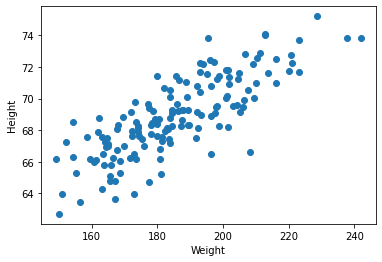

In [ ]:
# GRAPH DATA
plt.scatter(x, y)
plt.xlabel("Weight")
plt.ylabel("Height")

plt.show()

With our data now parsed and ready to use, let us start development of our machine learning functionality

In [ ]:
# DEFINE forward_pass
# When we evaluate all our datapoints using our model, we call it a forward pass

def forward_pass(x: list, params: dict) -> list:
	'''
	Calculates one forward pass for a linear model. For example, if 'w' = 2 and
    'b' = 0, then an input (x) of [1,2,3] would result in an output of [2,4,6].

	:param x: The input data. Should be a 1D list
	:param params: A dictionary which contains the parameters of the linear model:
		'w' - the weight for inputs 'x'
		'b' - the bias
	:returns: The outputs for inputs 'x'.
	'''

	# Unpack parameters from dictionary
  # CODE ~2 lines
  ########################################
	w = params['w']
	b = params['b']
  ########################################

	# The outputs
	y_hat = []

	# Calculate outputs for each input
	for val in x:
    # CODE ~1 line
    ########################################
		y_hat.append(val * w + b)
    ########################################

	return y_hat

In [ ]:
# TEST forward_pass
# DO NOT MODIFY THIS CELL

params_test = {"w": 10, "b": 5}
x_test = [1,2,3,4]
y_test = [15, 25, 35, 45]

y_hat_test = forward_pass(x_test, params_test)

if y_test == y_hat_test:
  print("TEST PASSED")
else:
  print("TEST FAILED")

TEST PASSED


In [ ]:
# DEFINE get_cost

# Remember, the cost function measures how good or bad a model is performing

def get_cost(y: list, y_hat: list) -> float:
	'''
	Calculates the mean squared error for predictions.

	:param y: The actual outputs.
	:param y_pred: The predicted outputs.
	:returns: The cost of the predictions
	'''
	cost = 0.0

	# Sum the costs for each output/prediction pair
	for (y_i, yh_i) in zip(y, y_hat):

    # CODE ~1 line
    ########################################
		cost += (y_i - yh_i)**2
    ########################################

	# Average the costs
  # CODE ~1 line
  ########################################
	cost = cost / None
  ########################################

	return cost

In [ ]:
# TEST get_cost
# DO NOT MODIFY THIS CELL

y_test = [2, 3, 4]

y_hat_test = [1, 1, 8]

cost_test = get_cost(y_test, y_hat_test)

if cost_test == 7:
  print("TEST PASSED")
else:
  print("TEST FAILED")

TEST PASSED


In [ ]:
# DEFINE backward_pass

# The backward pass calculates and returns the derivatives of the model's
# parameters

def backward_pass(x: list, y: list, params: dict) -> dict:
	'''
	Completes one step of backward propagation for a linear model
		using MSE as the cost function. 

	:param x: The input data.
	:param y: The output data.
	:param params: A dictionary which contains the parameters of the linear model:
		'w' - the weight for inputs 'x'
		'b' - the bias
	:returns: A dictionary containing the gradient for each paramater:
		'dw' - The derivative of the cost function with respect to 'w' (dC/dw)
		'db' - The derivative of the cost function with respect to 'b' (dC/db)
	'''

	# Unpack parameters from dictionary
	w = params['w']
	b = params['b']

	# dC/dw
	dw = 0.0

	# dC/db
	db = 0.0

	# Sum gradients for each input/output pair
	for x_i, y_i in zip(x, y):

		# Both of these formula are the formula for 
		# the derivative of the cost function with respect
		# to 'w' and 'b' respectively

    # CODE ~2 lines
    ########################################
		dw += -2 * x_i *(y_i - (w * x_i + b))
		db += -2 * (y_i - (w * x_i + b))
    ########################################

	# Average the sum of the gradients
  # CODE ~2 lines
  ########################################
	dw = dw / len(x)
	db = db / len(x)
  ########################################

	grads = {'dw': dw, 'db': db}

	return grads

In [ ]:
# TEST backward_pass
# DO NOT MODIFY THIS CELL

params_test = {'w': 5, 'b': 3}

x_test = [1,2,3]

y_test = [2,3,4]

grads_test = backward_pass(x_test, y_test, params_test)

if int(grads_test['dw']) == 45 and int(grads_test['db']) == 20:
  print("TEST PASSED")
else:
  print("TEST FAILED")

TEST PASSED


In [ ]:
# DEFINE train

# This function pieces together our previously created functions into cohesive
# unit

def train(x: list, y: list, params: dict, epochs: int = 1,
	learning_rate: float = 0.000025, vocal = True) -> tuple:
	'''
	Trains parameters to a linear model (i.e. y = w * x + b).

	:param x: The input data.
	:param y: The output data.
	:param params: A dictionary which contains the parameters of the linear model:
		'w' - the weight for inputs 'x'
		'b' - the bias
	:param epochs: The number of training itterations.
	:param learning_rate: The number which multiply's the gradiants to update parameters.
		If the 'learning_rate' is too large, the model will not train properly.
	:param vocal: If true, the function prints the current cost of the model to the standard
		output every 500 epochs.
	:returns: (new_params, cost_history) where 'new_params' is the new and trained
		set of parameters and 'cost_history' is a list containing the cost
		after each epoch.
	'''

	# Copy params dictionary to avoid side effects.
	new_params = params.copy()

	cost_history = []

	# Update paramaters 'epochs' times
	for i in range(epochs):

    # CODE ~3 lines
    ########################################
		y_hat = forward_pass(x, new_params)
		cost = get_cost(y, y_hat)
		grads = backward_pass(x, y, new_params)
    ########################################

		# Print cost status
		if vocal and i % 500 == 0:
			print(cost)

		# Unpack gradients
		dw = grads['dw']
		db = grads['db']
	
		# Update weight and bias
    # CODE ~2 lines
    ########################################
		new_params['w'] -= dw * learning_rate
		new_params['b'] -= db * learning_rate
    ########################################

		cost_history.append(cost)

	return new_params, cost_history

{'w': 1.9998844169091718, 'b': 1.002677847851403}


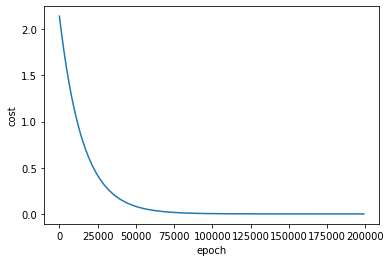

TEST PASSED


In [ ]:
# TEST train
# DO NOT MODIFY THIS CELL

params_test = {'w': 5, 'b': 3}

x_test = [1,2,3,4,30]

y_test = [3,5,7,9,61]

new_params_test, cost_history_test = train(x_test, y_test, params_test, 200000,
                                           vocal = False)

print(new_params_test)

plt.plot(cost_history_test[1000:])
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

if abs(new_params_test['w'] - 2) < 0.1 and abs(new_params_test['b'] - 1) < 0.1:
  print("TEST PASSED")
else:
  print("TEST FAILED")

We now have all of the functions neccisary to accomplish our goal of predicting one's height based on his or her weight.

Below, we will make the final implementation.

{'w': 0.10202803525409872, 'b': 49.99535261674366}


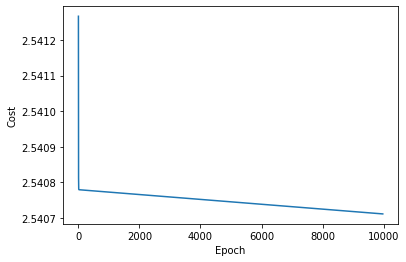

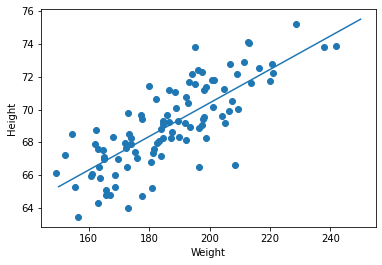

In [ ]:
# Select starting parameters
# These could be anything; however, the closer our initial guess it to being
# correct, the faster the model will train.
params = {'w': 0.2, 'b': 50}

# We will now train our model on our data.
# Remember, earlier we placed our data into the variables 'x' and 'y'.
params, cost_history = train(x, y, params, epochs = 10000, vocal = False)

# display results from training
print(params)

# Graph cost decay
plt.plot(cost_history[25:])
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Graph data
plt.scatter(x, y)

# Graph predictions
plt.plot([150, 250], [params['w'] * 150 + params['b'], params['w'] * 250 + params['b']])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()



In [ ]:
# This is a simple program which uses our found parameters

while True:

		user_input = input('Input the wieght of a person in' +
			' pounds and I will predict his/her height. Enter' + 
			' "EXIT" and this program will end.\n>> ')

		if user_input == 'EXIT':
			break

		try:
			weight = float(user_input)

			prediction = forward_pass([weight], params)

			print(f"The corresponding person is {prediction[0]} inches tall.\n")

		except ValueError:

			print('Invalid input. Please try again')

Input the wieght of a person in pounds and I will predict his/her height. Enter "EXIT" and this program will end.
>> 140
The corresponding person is 64.27927755231748 inches tall.

Input the wieght of a person in pounds and I will predict his/her height. Enter "EXIT" and this program will end.
>> 150
The corresponding person is 65.29955790485846 inches tall.

Input the wieght of a person in pounds and I will predict his/her height. Enter "EXIT" and this program will end.
>> 200
The corresponding person is 70.4009596675634 inches tall.

Input the wieght of a person in pounds and I will predict his/her height. Enter "EXIT" and this program will end.
>> EXIT
